## Analysis of medical publications about COVID-19
The objective of the project is to visualize the dataset and generate insights about research on COVID-19.

Dataset:https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Task 1 (5 marks) - What is the distribution of journals per source?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

Importing all the necessary libraries.

In [2]:
df = pd.read_csv(r'metadata.csv', low_memory=False)
df.head()

cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Extracting the columns source_x, title, journal, doi, abstract, and publish_time from the dataframe.

In [3]:
df = df[['source_x', 'title', 'journal', 'doi', 'abstract', 'publish_time']]

In [4]:
df.head()

source_x                                              title         journal  \
0      PMC  Clinical features of culture-proven Mycoplasma...  BMC Infect Dis   
1      PMC  Nitric oxide: a pro-inflammatory mediator in l...      Respir Res   
2      PMC    Surfactant protein-D and pulmonary host defense      Respir Res   
3      PMC               Role of endothelin-1 in lung disease      Respir Res   
4      PMC  Gene expression in epithelial cells in respons...      Respir Res   

                     doi                                           abstract  \
0  10.1186/1471-2334-1-6  OBJECTIVE: This retrospective chart review des...   
1           10.1186/rr14  Inflammatory diseases of the respiratory tract...   
2           10.1186/rr19  Surfactant protein-D (SP-D) participates in th...   
3           10.1186/rr44  Endothelin-1 (ET-1) is a 21 amino acid peptide...   
4           10.1186/rr61  Respiratory syncytial virus (RSV) and pneumoni...   

  publish_time  
0   2001-07-04  
1   2000-08-15  
2   2000-08-25  
3   2001-02-22  
4   2001-05-11

Extracting the first source from source_x column and storing into a column source_1

In [5]:
df['source_1'] = [df['source_x'][i].split(';')[0] for i in range(len(df))]
df.head()

source_x                                              title         journal  \
0      PMC  Clinical features of culture-proven Mycoplasma...  BMC Infect Dis   
1      PMC  Nitric oxide: a pro-inflammatory mediator in l...      Respir Res   
2      PMC    Surfactant protein-D and pulmonary host defense      Respir Res   
3      PMC               Role of endothelin-1 in lung disease      Respir Res   
4      PMC  Gene expression in epithelial cells in respons...      Respir Res   

                     doi                                           abstract  \
0  10.1186/1471-2334-1-6  OBJECTIVE: This retrospective chart review des...   
1           10.1186/rr14  Inflammatory diseases of the respiratory tract...   
2           10.1186/rr19  Surfactant protein-D (SP-D) participates in th...   
3           10.1186/rr44  Endothelin-1 (ET-1) is a 21 amino acid peptide...   
4           10.1186/rr61  Respiratory syncytial virus (RSV) and pneumoni...   

  publish_time source_1  
0   2001-07-04      PMC  
1   2000-08-15      PMC  
2   2000-08-25      PMC  
3   2001-02-22      PMC  
4   2001-05-11      PMC

Text(0.5, 1.0, 'Top 10 Journals based on Number of Publications')

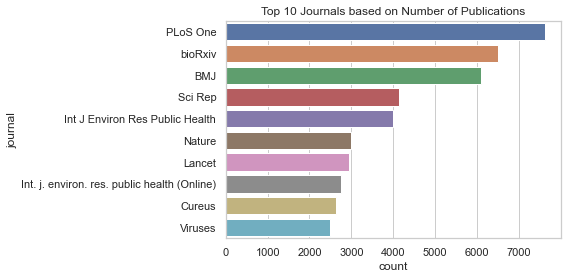

In [6]:
sns.countplot(y = 'journal',data = df,
              order=df['journal'].value_counts().iloc[:10].index).set_title('Top 10 Journals based on Number of Publications')

The above plot shows the 10 most frequently used journals using seaborne countplot. Most frequent journals are found using value_counts and are indexed for finding top 10.

Text(0, 0.5, 'log(count)')

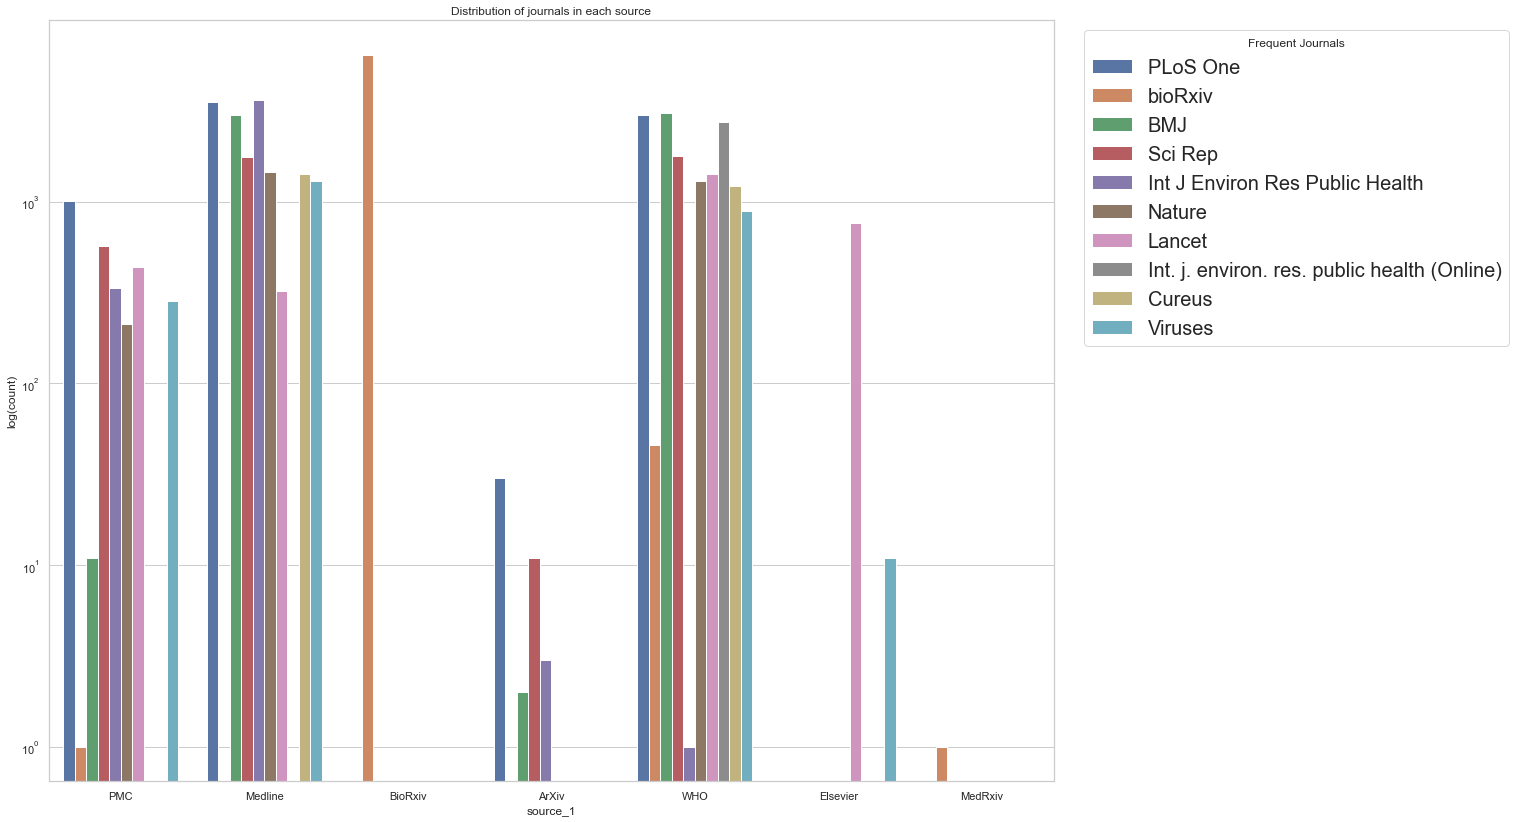

In [7]:
fig, ax = plt.subplots(figsize=(18,14))
ax.set_yscale('log')
sns.countplot(x = 'source_1', data = df, ax =ax, hue = 'journal', 
              hue_order = list(df['journal'].value_counts()[:10].index)).set_title('Distribution of journals in each source')
plt.legend(title = 'Frequent Journals',loc='upper left', bbox_to_anchor=(1.02, 1), prop={"size":20})
plt.ylabel('log(count)')

The above plot shows the distribution of publications in each journal using seaborne countplot. source_1 was set as x journal was selected as hue to find out the distribution of journals in each source. Y axis was set to log scale as the range of counts is quite large.

## Task 2 (5 marks) - What are the main clusters?

Due to computational issues, only a  subset of data was considered for carrying out remaning tasks by random sampling.

In [8]:
df = df.sample(15000, random_state=55)

Checking if the data has any null values in the dataframe.

In [9]:
df.isna().sum()

source_x           0
title              4
journal          867
doi             7605
abstract        3970
publish_time       2
source_1           0
dtype: int64

Droping the null values from the dataframe.

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5380 entries, 685273 to 654915
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source_x      5380 non-null   object
 1   title         5380 non-null   object
 2   journal       5380 non-null   object
 3   doi           5380 non-null   object
 4   abstract      5380 non-null   object
 5   publish_time  5380 non-null   object
 6   source_1      5380 non-null   object
dtypes: object(7)
memory usage: 336.2+ KB


Importing all the neceassary libraries

In [11]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df['cleaned_abstract'] = df['abstract'].astype('str')
def clean_text(df,clean_text, text_field):
    df[clean_text] = df[text_field].str.lower()
    df[clean_text] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

df = clean_text(df, 'cleaned_abstract', 'abstract')
df.head()

source_x  \
685273  Elsevier; Medline; PMC   
764219            Medline; PMC   
588882            Medline; PMC   
7877                       PMC   
765505            Medline; PMC   

                                                    title  \
685273  Receptive Music Therapy to reduce stress and i...   
764219  The impact of social distancing on COVID-19 in...   
588882  Leveraging Telehealth to improve access to car...   
7877        Role of Podocyte Injury in Glomerulosclerosis   
765505  New Onset Vertigo After COVID-19 Infection. A ...   

                                         journal  \
685273                           Arts Psychother   
764219              Trop Dis Travel Med Vaccines   
588882                       BMC Health Serv Res   
7877    Renal Fibrosis: Mechanisms and Therapies   
765505       Indian J Otolaryngol Head Neck Surg   

                                 doi  \
685273     10.1016/j.aip.2020.101688   
764219    10.1186/s40794-021-00137-3   
588882    10.1186/s12913-021-06080-5   
7877    10.1007/978-981-13-8871-2_10   
765505    10.1007/s12070-021-02715-5   

                                                 abstract publish_time  \
685273  The influence of music therapy (MT) as a suppo...   2020-07-15   
764219  BACKGROUND: To assess the impact of the social...   2021-05-04   
588882  BACKGROUND: Obstructive sleep apnea is common ...   2021-01-21   
7877    Finding new therapeutic targets of glomerulosc...   2019-06-19   
765505  In addition to the known pathophysiological se...   2021-07-04   

        source_1                                   cleaned_abstract  
685273  Elsevier  The influence of music therapy MT as a support...  
764219   Medline  BACKGROUND To assess the impact of the social ...  
588882   Medline  BACKGROUND Obstructive sleep apnea is common a...  
7877         PMC  Finding new therapeutic targets of glomerulosc...  
765505   Medline  In addition to the known pathophysiological se...

A function clean_text was defined to clean the abstract by converting abstract into lower case and removing any special charcters as well as punctuation marks present in abstarct.

In [13]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


Stopwords was set to variable stop and WordNet lemmatizer was set to lemmatizer.
A function furnished was defined to tokenize each word, to remove stop words from the text and convert words to their base form. 

In [14]:
df['cleaned_abstract'] = df['cleaned_abstract'].apply(furnished)

In [15]:
def vectorize(text, maxx_features):
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

A function vectorize tis defined to vectorize the text using TF-IDF vectorizer which gives sparse matrix as an output. Max_features was set as maximum length of the text.

In [16]:
text = df['cleaned_abstract'].values
max_features = 1000

X = vectorize(text, max_features)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_pca = pca.fit_transform(X.toarray())
X_pca.shape

(5380, 799)

Principal Component analysis was used for dimensionality reduction of sparse matrix, as it is computationally expensive to fit model to data of higher dimensions. N-components was set to 0.95 to keep 95% of the varience present in input.

Text(0.5, 1.0, 'Sum of Squared Error vs No of Clusters(K)')

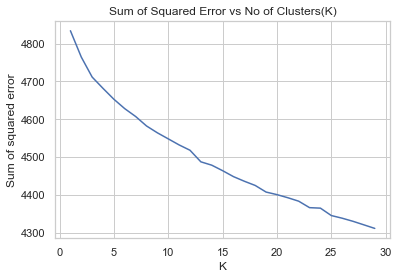

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

sse = []
k_rng = range(1,30)
for i in k_rng:
    km = KMeans(n_clusters= i)
    km.fit(X_pca)
    sse.append(km.inertia_)
    
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.title('Sum of Squared Error vs No of Clusters(K)')

For clustering the data into different clusters, Kmeans was used. In order to find the optimal number of clusters, kmeans inbulit metric inertia_ was used. Inertia_ measures the  sum of square of distance between centriod of the cluster and each observation of the cluster.

From the graph between Sum of Squared Error vs No of Clusters(K), SSE has reduced drastically till k = 9, after that there isn't reduction as before. So, let's Consider optimal number of cluster to be 9.

Predicting the clusters an storing them in variable y using k = 9.

In [19]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=55)
y_pred = kmeans.fit_predict(X_pca)
df['y'] = y_pred

TNSE was used to reduce the matrix to two dimensions, so that clusters can be plot on 2-D graph.

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5380 samples in 0.012s...
[t-SNE] Computed neighbors for 5380 samples in 1.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5380
[t-SNE] Computed conditional probabilities for sample 2000 / 5380
[t-SNE] Computed conditional probabilities for sample 3000 / 5380
[t-SNE] Computed conditional probabilities for sample 4000 / 5380
[t-SNE] Computed conditional probabilities for sample 5000 / 5380
[t-SNE] Computed conditional probabilities for sample 5380 / 5380
[t-SNE] Mean sigma: 0.408594
[t-SNE] KL divergence after 250 iterations with early exaggeration: 160.742401
[t-SNE] KL divergence after 1000 iterations: 3.741148


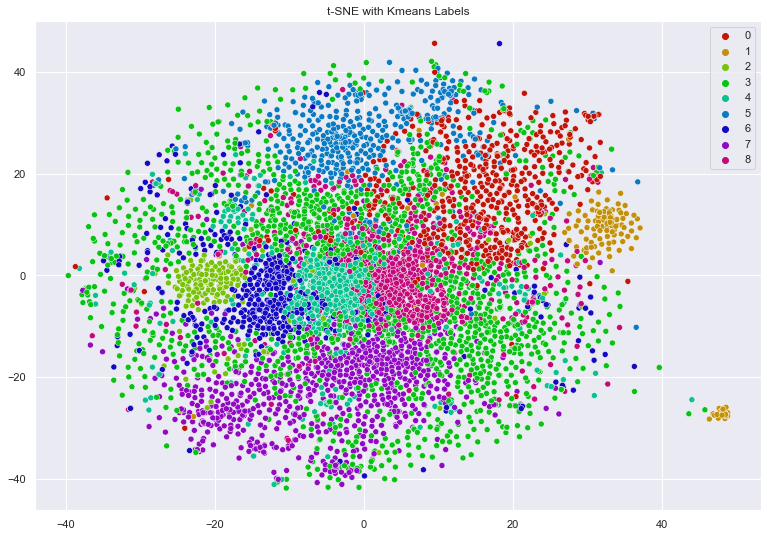

In [21]:
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()


Seaborne Scatterplot was used to visualize cluster. Input for scatterplot was two dimensional array created using tsne and hue was set to y in order to differtiate clusters.

## Task 3 (5 marks) - For each cluster, what are the most representative words?

In order to find most represntative words from each cluster, lets remove the common words across all cluster. To determine common words, a function get_top_n_words was defined. It uses count vectorizer to find the word frequency and returns top 30 words.

In [22]:
def get_top_n_words(corpus, stop_words = stopwords, n=None):
    vec = CountVectorizer(stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

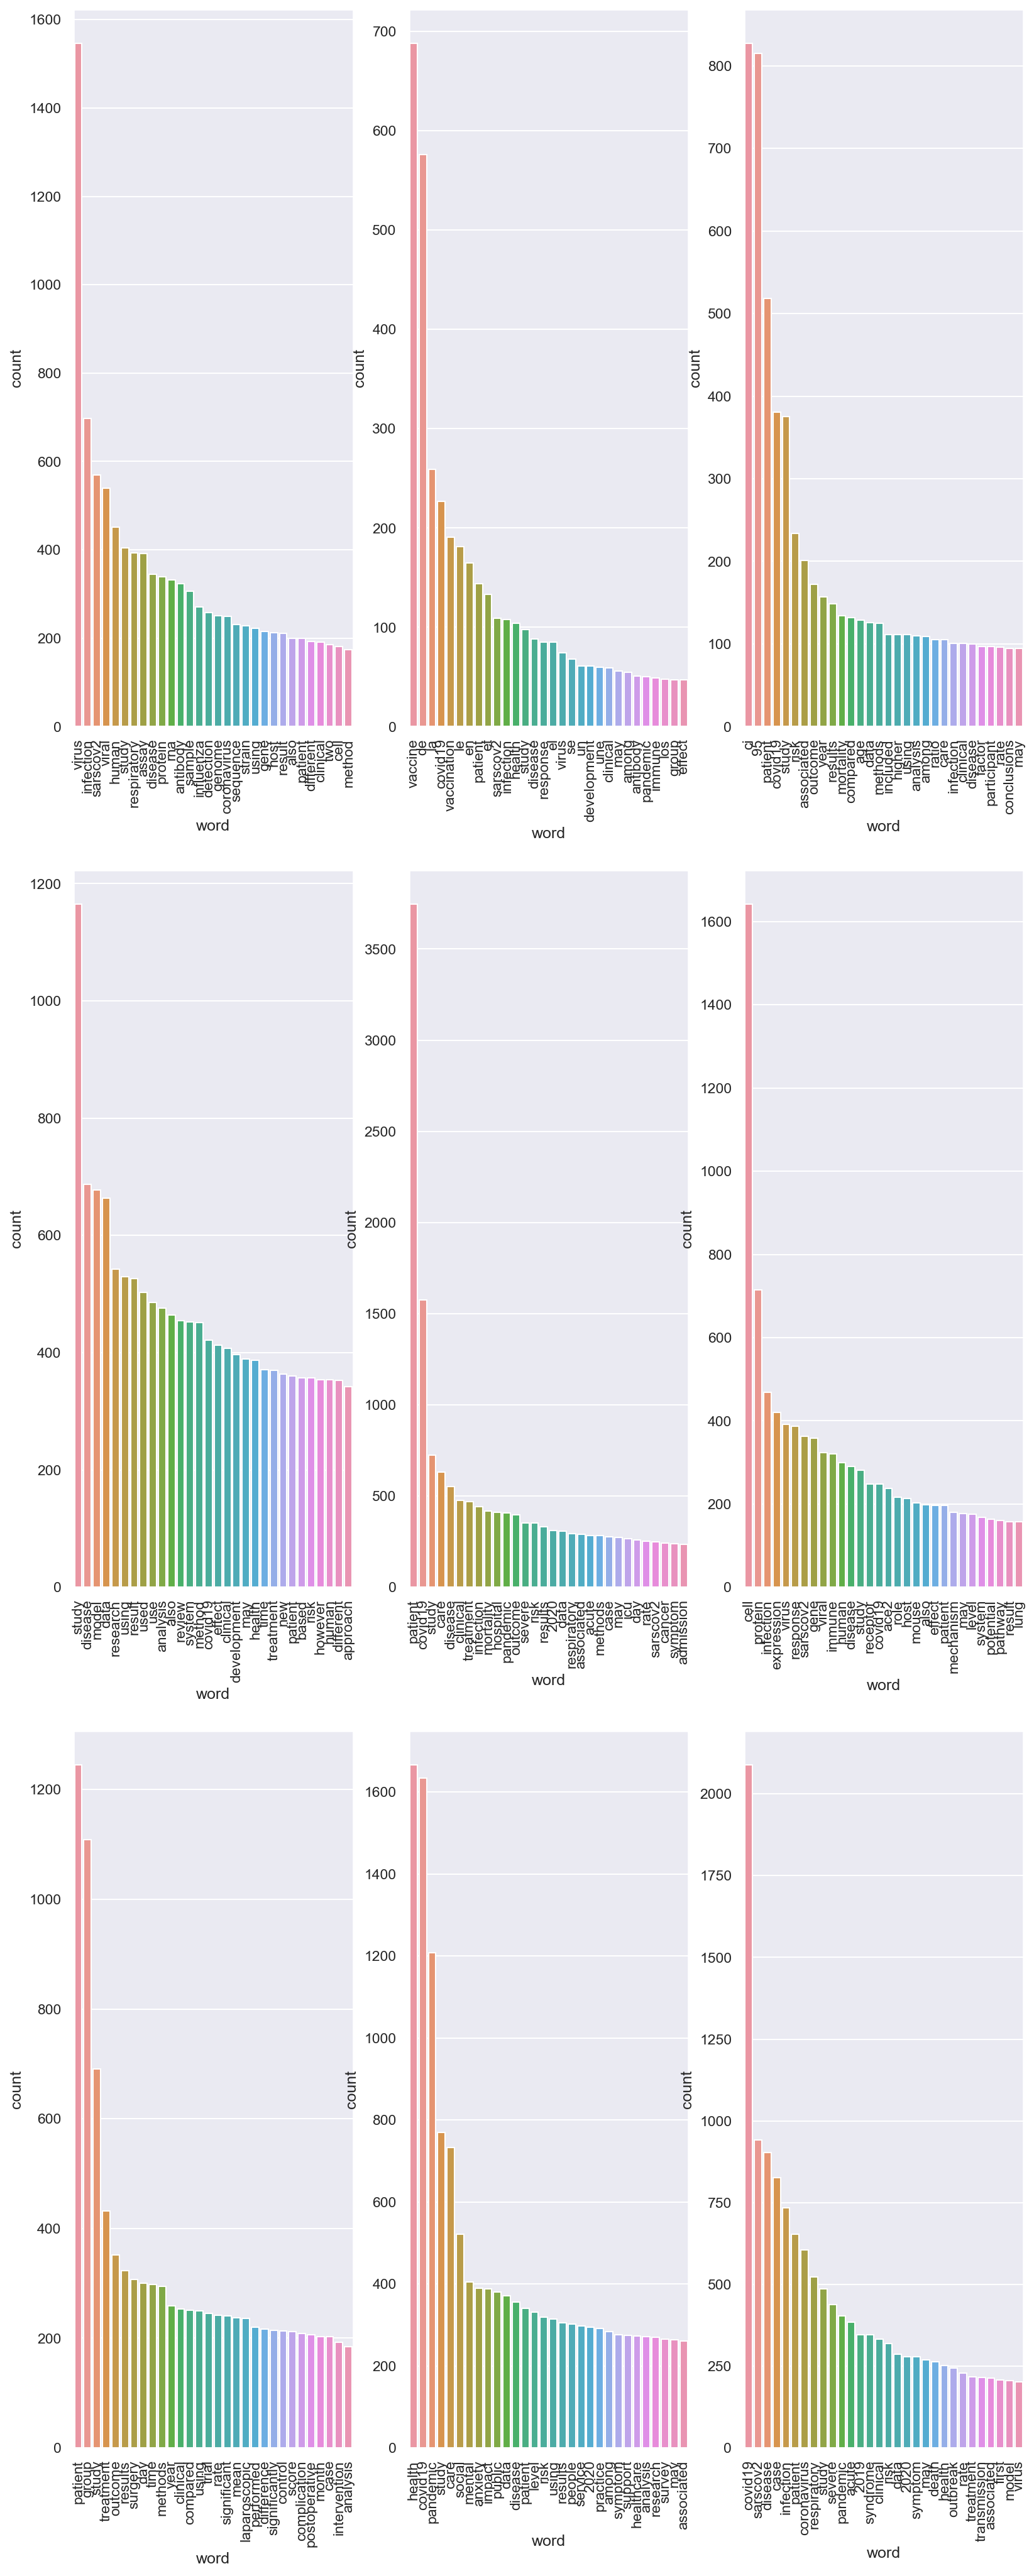

In [23]:
plt.figure(dpi = 150)
for cluster_id in range(9):
    plt.subplot(3, 3, cluster_id+1)
    common_words = get_top_n_words(df[df['y'] == cluster_id]['cleaned_abstract'], stop_words = 'English', n = 30)
    df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
    fig  = sns.barplot(x=df2['word'], y=df2['count'], data = df2)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.subplots_adjust(top = 3)
    plt.tight_layout

Seaborne bar plot was used to see most used words in each cluster. After observing the bar plot of each cluster, the words which are irrelavant and which are found in most of the clusters are added to the custom_stop_words

In [24]:
custom_stop_words = ['covid19', 'pandemic', 'sarscov2','conclusion', 'et', 'disease', 'patient', 'case','result', 'p', 'de', 'infection', 'coronavirus','study','2020','ci', '95', 'la', 'en', 'le','el', 'se', 'une','los', 'que','ma']

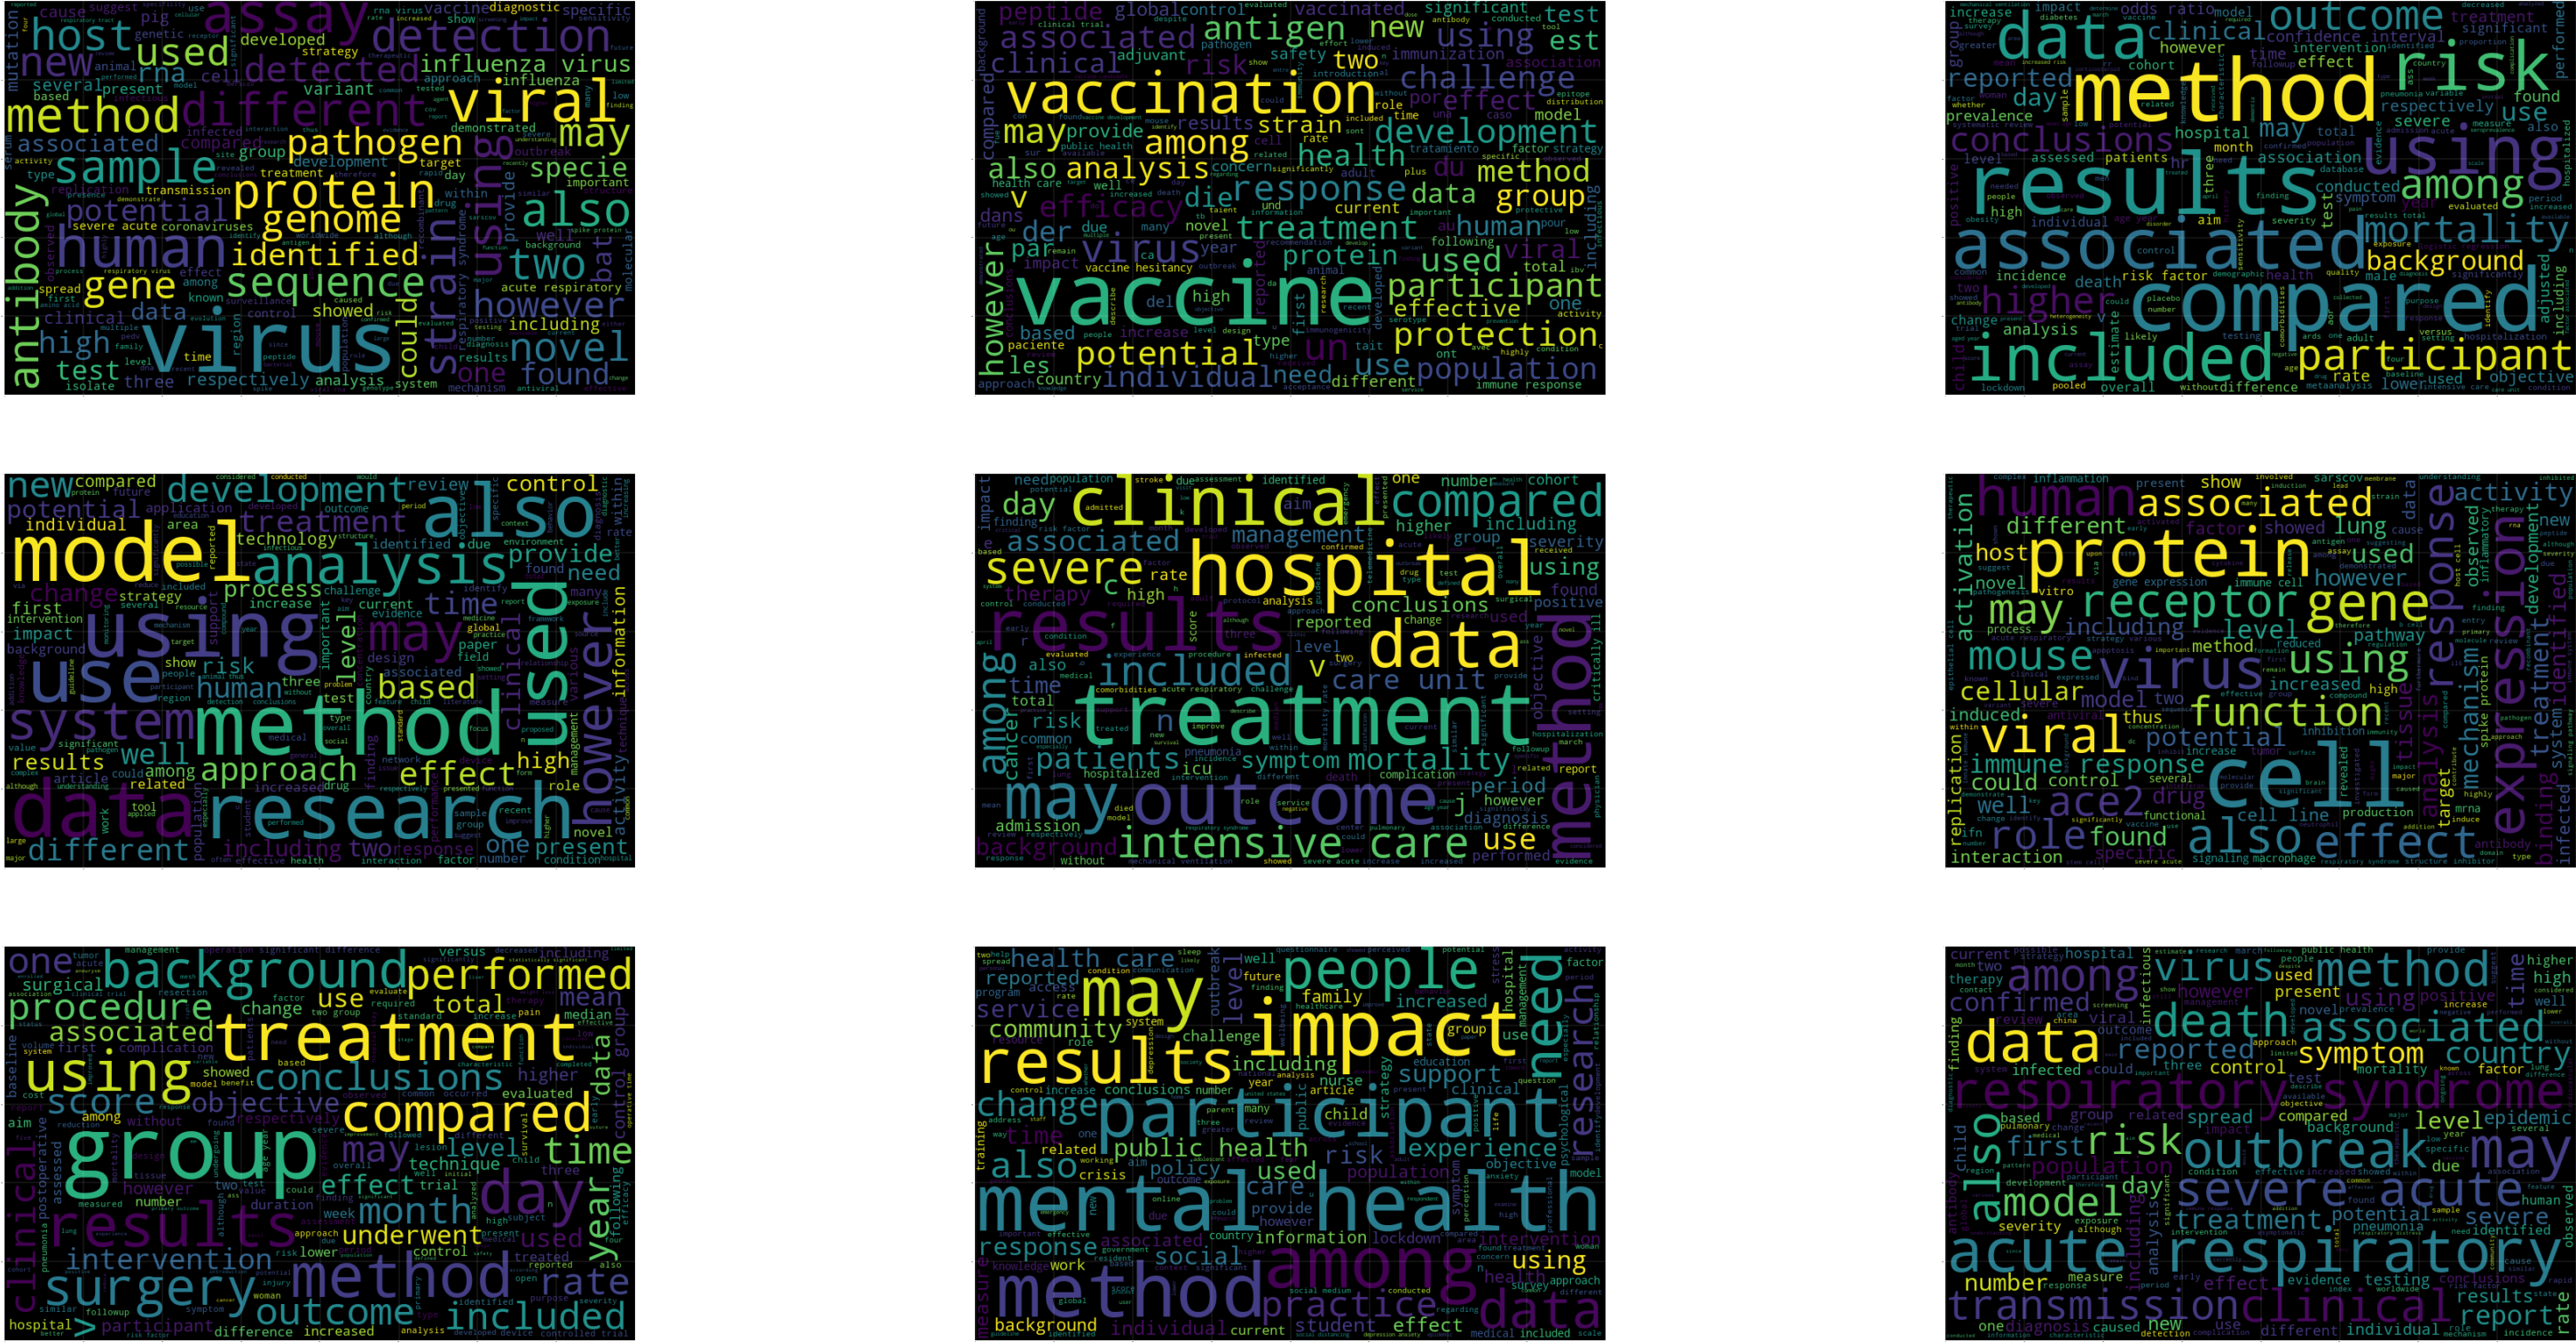

In [25]:

from wordcloud import WordCloud
plt.figure(figsize=(400,200), dpi=10)
for cluster_id in range(9):
    plt.subplot(3, 3, cluster_id+1)
    all_words = ' '.join([text for text in df[df['y'] == cluster_id]['cleaned_abstract']])
    wordcloud = WordCloud(width=800, height=500, stopwords = custom_stop_words, random_state=21, max_font_size=110).generate(all_words)
    plt.imshow(wordcloud, interpolation='bilinear')

The above plot wordcloud plot shows the most representative words in each cluster after removing custom_stop_words.

## Task 4 (5 marks) - What are the most common topics?

In [26]:
vectorizer = CountVectorizer(analyzer='word', stop_words = custom_stop_words, max_features=5000)

data_vectorized = vectorizer.fit_transform(df['cleaned_abstract'])

Count Vectorizer is used to vectorize the cleaned abstract text.

To find most common topics, LatentDirichletAllocation is used. To find the optimal number of topics for a given text data, hyperparameter tuning library GridSearchCV is used, in which n_components was optimised with log likelihood as the metric for evaluation.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
grid_params = {'n_components' : list(range(5,10))}
# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(data_vectorized)
# Estimators for LDA model
best_lda = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)


Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -871292.0704638066


After tuning the LDA on the data, it is found that 5 topics are optimal for topic modelling with least log likelihood. so, lets consider no of topics as 5.

Lets import pyLDAvis for visualizing the topics in fitted model using given text corpus

In [28]:
import pyLDAvis

In [29]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(best_lda, data_vectorized,vectorizer,mds='tsne')

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  26.957774
3       51.163364 -159.968018       2        1  21.932966
4      -73.144554   21.523815       3        1  18.894369
2      -66.410133 -110.606438       4        1  18.238543
1       54.417324   12.443444       5        1  13.976349, topic_info=             Term         Freq        Total Category  logprob  loglift
822          cell  2095.000000  2095.000000  Default  30.0000  30.0000
4876        virus  2472.000000  2472.000000  Default  29.0000  29.0000
2155       health  2834.000000  2834.000000  Default  28.0000  28.0000
3698      protein  1359.000000  1359.000000  Default  27.0000  27.0000
3992  respiratory  1595.000000  1595.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2704        level   353.926844  1511.784738   Topic5  -5.3847   0.5158
1854       factor   317.853795  1326.141790   Topic5  -5.4922   0.5394
4532       system   319.942835  1368.570647   Topic5  -5.4857   0.5144
918      clinical   330.699436  2070.136596   Topic5  -5.4526   0.1336
563    associated   318.923537  1635.523824   Topic5  -5.4889   0.3330

[442 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
134       1  0.205449      2019
134       2  0.208530      2019
134       3  0.021572      2019
134       4  0.391380      2019
134       5  0.172577      2019
...     ...       ...       ...
4984      5  0.011526      year
4995      3  0.992997      zikv
4999      3  0.939872  zoonotic
4999      4  0.008703  zoonotic
4999      5  0.052215  zoonotic

[990 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

By selecting the topic number on the visualization, we can find the frequently used words in each topic.

## Task 5 (5 marks) - What are the most common topics in each cluster?

In [30]:
lda1 =  LatentDirichletAllocation(n_components = 5)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
lda1.fit(data_vectorized)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5)

Data was fit to the best model i.e., the model with n_components = 5 

In [32]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda1, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word 0      Word 1    Word 2     Word 3     Word 4    Word 5  \
Topic 0       health        care    social   research       data    impact   
Topic 1      vaccine       model    method      using  detection      data   
Topic 2  respiratory  associated  clinical  mortality     severe      risk   
Topic 3         cell       virus   protein      viral      human  response   
Topic 4        group   treatment   surgery      trial    outcome   results   

        Word 6   Word 7      Word 8   Word 9     Word 10      Word 11  \
Topic 0   risk   public      people  measure  healthcare        among   
Topic 1   used    virus      system    assay      sample          new   
Topic 2    day    acute        year     rate     symptom          age   
Topic 3   gene   immune  expression     host        also  respiratory   
Topic 4  using  methods    clinical     time    compared     surgical   

         Word 12    Word 13    Word 14    Word 15       Word 16      Word 17  \
Topic 0      may   practice        use    medical       service         need   
Topic 1    based   approach       test  different   vaccination         also   
Topic 2  results      group    outcome     higher       methods     compared   
Topic 3      may       role  potential     effect          drug     activity   
Topic 4   effect  procedure        use  performed  intervention  significant   

           Word 18  Word 19  
Topic 0     change    using  
Topic 1      human  control  
Topic 2   hospital     care  
Topic 3  mechanism   severe  
Topic 4        day   cancer

The function show_topics was defined to determine the 20 important key words for each topic and is stored in a dataframe df_topic_keywords.

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


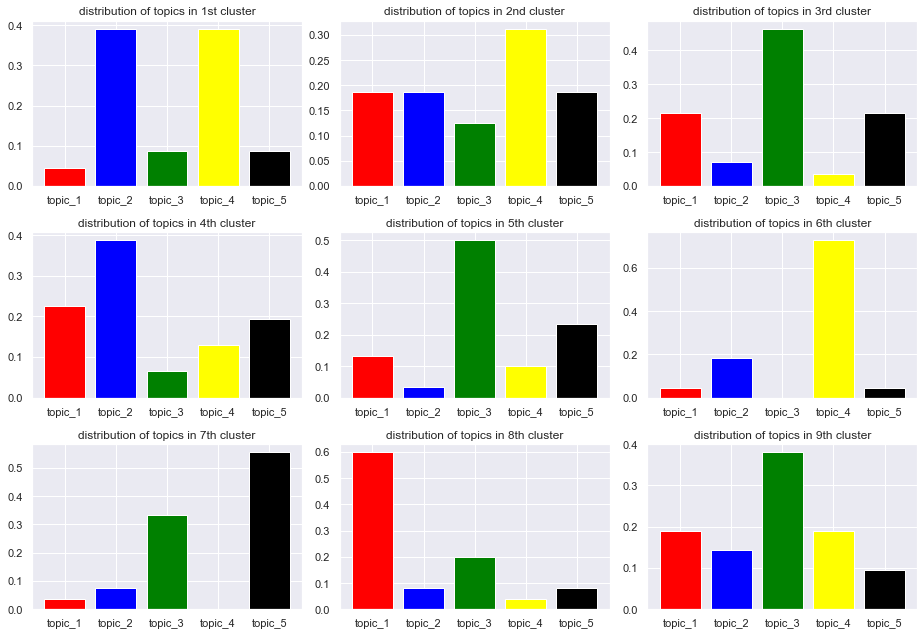

In [33]:

fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)
ax1.title.set_text('distribution of topics in 1st cluster')
ax2.title.set_text('distribution of topics in 2nd cluster')
ax3.title.set_text('distribution of topics in 3rd cluster')
ax4.title.set_text('distribution of topics in 4th cluster')
ax5.title.set_text('distribution of topics in 5th cluster')
ax6.title.set_text('distribution of topics in 6th cluster')
ax7.title.set_text('distribution of topics in 7th cluster')
ax8.title.set_text('distribution of topics in 8th cluster')
ax9.title.set_text('distribution of topics in 9th cluster')


for cluster_id in range(9):
    plt.subplot(3, 3, cluster_id+1)
    common_words = get_top_n_words(df[df['y'] == cluster_id]['cleaned_abstract'], stop_words = custom_stop_words, n = 30)
    df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
    a = list()
    for i in range(5):
        c = 0
        for w in df2['word']:
            if w in list(df_topic_keywords.iloc[i]):
                c = c+1
        a.append(c)
    x = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
    a = [p/sum(a) for p in a]
    plt.bar(x, a , color=['red', 'blue', 'green', 'yellow', 'black'])
    
    

plt.tight_layout()
          

The above graph shows the distribution of different topics in each cluster. Barplot was used for this graph, in which common words are the most frequent words from each cluster and are stored in a dataframe df2. For loop is used to count no of words from df2 which are common in each topic. Then a barplot is plotted to detemine the distribution of topics in each cluster.


From the above graph, it can be concluded that 1st cluster contains topic_2 and topic_4, 2nd cluster has topic_4 , 3rd cluster has topic_3, 4th cluster has topic_2, 5th cluster has topic_3, 6th cluster has topic_4, 7th cluster has topic_5, 8th cluster has topic_1 and 9th cluster has topic_3.